In [43]:
import pandas
import seaborn as sns
df_train = pandas.read_csv('train.csv')
df_train= pandas.DataFrame(df_train)

df_train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [38]:
 len(df_train),df_train.shape[1]

(13173, 152)

In [25]:

##kaggledan
desc = pandas.DataFrame(index = list(df_train))
desc['type'] = df_train.dtypes
desc['count'] = df_train.count()
desc['nunique'] = df_train.nunique()
desc['%unique'] = desc['nunique'] /len(df_train) * 100
desc['null'] = df_train.isnull().sum()
desc['%null'] = desc['null'] / len(df_train) * 100
desc = pandas.concat([desc,df_train.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'],color='green')\
    .bar(subset=['max'],color='red')\
    .bar(subset=['min'], color='purple')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,13173,13173,100.000000,0,0.000000,555441.784939,259476.503094,100043.000000,335100.000000,555769.000000,780967.000000,999982.000000
patient_zip3,int64,13173,751,5.701055,0,0.000000,568.530859,275.758485,100.000000,330.000000,557.000000,832.000000,995.000000
patient_age,int64,13173,67,0.508616,0,0.000000,59.271313,13.218883,18.000000,50.000000,59.000000,67.000000,91.000000
metastatic_diagnosis_period,int64,13173,366,2.778410,0,0.000000,96.515221,108.969873,0.000000,3.000000,44.000000,181.000000,365.000000
population,float64,13173,751,5.701055,0,0.000000,20651.373928,13840.379638,635.550000,9160.340000,18952.780000,30021.280000,71374.130000
density,float64,13173,747,5.670690,0,0.000000,1776.872376,3876.061897,0.920000,163.150000,700.340000,1666.520000,29851.690000
age_median,float64,13173,594,4.509223,0,0.000000,40.542676,4.031027,20.600000,37.190000,40.640000,42.940000,54.570000
age_under_10,float64,13173,450,3.416078,0,0.000000,11.104988,1.511534,0.000000,10.150000,11.000000,12.140000,17.680000
age_10_to_19,float64,13173,472,3.583087,0,0.000000,12.857587,1.952248,6.310000,11.650000,12.900000,13.910000,35.300000
age_20s,float64,13173,519,3.939877,0,0.000000,13.297375,3.390472,5.930000,11.000000,12.530000,14.970000,62.100000


In [10]:
df_train.nunique()

patient_id                     13173
patient_race                       5
payer_type                         3
patient_state                     44
patient_zip3                     751
                               ...  
Average of Sep-18                639
Average of Oct-18                664
Average of Nov-18                661
Average of Dec-18                663
metastatic_diagnosis_period      366
Length: 152, dtype: int64

In [12]:
df.isna().sum()

patient_id                        0
patient_race                   6657
payer_type                     1765
patient_state                     0
patient_zip3                      0
                               ... 
Average of Sep-18                 7
Average of Oct-18                 7
Average of Nov-18                12
Average of Dec-18                33
metastatic_diagnosis_period       0
Length: 152, dtype: int64

"Q1 = df['AVG'].quantile(0.25)\nQ3 = df['AVG'].quantile(0.75)\nIQR = Q3 - Q1    #IQR is interquartile range. \n\nfilter = (df['AVG'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)\ndf.loc[filter] "

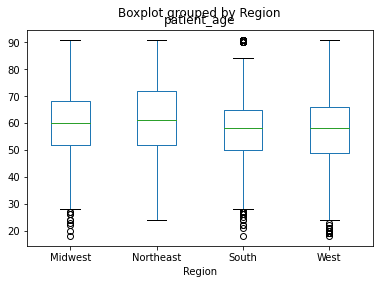

In [14]:
#outliers

df_train.boxplot(by ='Region', column =['patient_age'], grid = False) 


"""Q1 = df['AVG'].quantile(0.25)
Q3 = df['AVG'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['AVG'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)
df.loc[filter] """

<AxesSubplot:title={'center':'metastatic_diagnosis_period'}, xlabel='patient_race'>

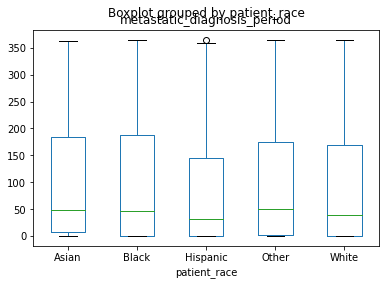

In [15]:
#outliers

df_train.boxplot(by ='patient_race', column =['metastatic_diagnosis_period'], grid = False) 

In [28]:
#cat ve cont olanları doğru görmüyor
#target,categoric
target = 'metastatic_diagnosis_period'
num_col = [f for f in df_train._get_numeric_data().columns if f!= target]
target
num_col
cat_col  = list(df_train.drop(num_col, axis = 1))
cat_col

['patient_race',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_gender',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'metastatic_first_novel_treatment',
 'metastatic_first_novel_treatment_type',
 'metastatic_diagnosis_period']

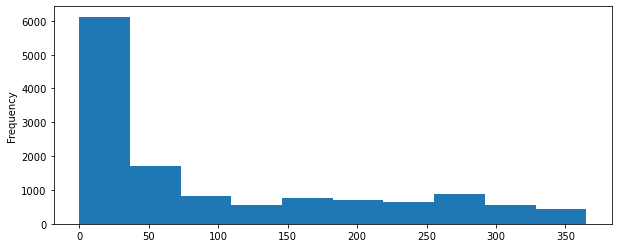

In [30]:
target_dist = df_train[target].plot(kind='hist', figsize=(10, 4), xlabel=target, ylabel='Count')

<AxesSubplot:>

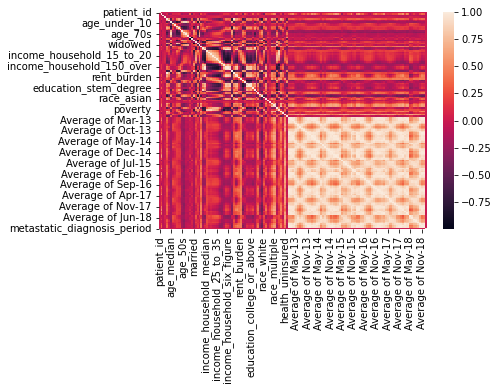

In [44]:
#correlation

# calculate the correlation matrix on the numeric columns
corr = df_train.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)